# Project: Building a Better Forecast Model for Apple’s Stock Price Prediction

# 1. Data Science Problem

This project aims to build a better forecast model to predict Apple stock prices.

# 2. Data Wrangling

## Data Source

Load csv files consist of dividend,earnings,stockprice and summary data down loaded from Kaggle data [https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data?select=stocks_latest]

## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# To switch to seaborn defaults, simply call the set_theme() function.
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline
import os

import datetime
from datetime import datetime, timedelta

import warnings # to ignore warning message
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
# load data
dividend_df = pd.read_csv('data/stocks_latest/dividends_latest.csv')
earning_df = pd.read_csv('data/stocks_latest/earnings_latest.csv')
stockprice_df = pd.read_csv('data/stocks_latest/stock_prices_latest.csv')
summary_df = pd.read_csv('data/stocks_latest/dataset_summary.csv')

In [3]:
dividend_df.head(5)

,symbol,date,dividend
0,MSFT,2016-11-15,0.39
1,MSFT,2011-05-17,0.16
2,MSFT,2008-05-13,0.11
3,MSFT,2011-02-15,0.16
4,MSFT,2012-02-14,0.20


In [4]:
dividend_df.shape

(258917, 3)

In [5]:
earning_df.head(5)

,symbol,date,qtr,eps_est,eps,release_time
0,A,2009-05-14,04/2009,NaN,NaN,post
1,A,2009-08-17,07/2009,NaN,NaN,post
2,A,2009-11-13,10/2009,NaN,NaN,pre
3,A,2010-02-12,01/2010,NaN,NaN,pre
4,A,2010-05-17,04/2010,NaN,NaN,post


In [6]:
earning_df.shape

(168603, 6)

In [7]:
stockprice_df.head(5)

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.61,42.29,41.51,42.25,38.6773,74640000,1.0


In [8]:
stockprice_df.shape

(24395016, 9)

In [9]:
summary_df.head()

,symbol,total_prices,stock_from_date,stock_to_date,total_earnings,earnings_from_date,earnings_to_date
0,A,5418,1999-11-18,2021-06-02,49,2009-05-14,2021-05-25
1,AA,1153,2016-11-01,2021-06-02,18,2017-01-24,2021-04-15
2,AAAP,574,2015-11-11,2018-07-18,0,NaN,NaN
3,AABA,5486,1998-01-02,2020-03-10,14,2014-01-28,2017-04-18
4,AAC,1342,2014-10-02,2021-06-02,22,2014-11-05,2019-08-30


In [10]:
summary_df.shape

(7786, 7)

## Data Organization

Create subfolders running the lines below to organize project directory 
- os.makedirs('figures/')
- os.makedirs('results/')

In [11]:
print(os.listdir())

['.ipynb_checkpoints', 'data', 'Data_Information.docx', 'figures', 'models', 'references', 'results', 'Stock_Price_Prediction.ipynb']


## Data Description

### Dividend dataframe columns description

- **symbol:** symbol of a company under which it operates in stock market 
- **date:** dividend issue date for a share
- **dividend:** proportion of dividend issued

### Earning dataframe columns description

- **symbol:** symbol of a company under which it operates in stock market
- **date:** earning issue date
- **qtr:** the month and quarter (Q1, Q2, Q3 and Q4) of the year the earning was declared
- **eps_est:** estimated eps (earning per share)
- **eps:** exact eps
- **release_time** earning issue date before or after the declaration date

### Stockprice dataframe columns description

- **symbol:** symbol of a company under which it operates in stock market
- **date:**	trading day of the year
- **open:**	opening price in a day
- **high:**	high price for a particular day
- **low:**	low price in a day
- **close:** closing price for a day
- **close_adjusted:** amended price that truly reflects stocks value after any corporate actions
- **volume:** total volume traded in a day
- **split_coefficient:**	the ratio by which a firms outstanding share increases following a stock split. Higher is the 'stock split' reduced the price would be

### Summary dataframe columns description

- **symbol:** symbol of a company under which it operates in stock market
- **total_prices:**	price change of the company in the specified duration
- **stock_from_date:** counting start date
- **stock_to_date:** counting stop date
- **total_earnings:** total earning of the company in the specified time
- **earnings_from_date:** the date from when earning count started
- **earnings_to_date:**	the date from when earning count stopped

## Data Revision

This step involves reviewing data types, column names, and unique values

### Data Types

In [12]:
print('\ndividend data type information: \n', dividend_df.info())
print('\nearning data type information: \n', earning_df.info())
print('\nstock price data type information: \n', stockprice_df.info())
print('\nsummary data type information: \n', summary_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258917 entries, 0 to 258916
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   symbol    258917 non-null  object 
 1   date      258917 non-null  object 
 2   dividend  258917 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.9+ MB

dividend data type information: 
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168603 entries, 0 to 168602
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   symbol        168603 non-null  object 
 1   date          168603 non-null  object 
 2   qtr           167599 non-null  object 
 3   eps_est       111347 non-null  float64
 4   eps           136216 non-null  float64
 5   release_time  108400 non-null  object 
dtypes: float64(2), object(4)
memory usage: 7.7+ MB

earning data type information: 
 None
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [13]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7786 entries, 0 to 7785
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   symbol              7786 non-null   object
 1   total_prices        7786 non-null   int64 
 2   stock_from_date     7786 non-null   object
 3   stock_to_date       7786 non-null   object
 4   total_earnings      7786 non-null   int64 
 5   earnings_from_date  5187 non-null   object
 6   earnings_to_date    5187 non-null   object
dtypes: int64(2), object(5)
memory usage: 425.9+ KB


### Column Names

In [14]:
print('\ndividend columns: \n', dividend_df.columns)
print('\nearning columns: \n', earning_df.columns)
print('\nstock price columns: \n', stockprice_df.columns)
print('\nsummary columns: \n', summary_df.columns)


dividend columns: 
 Index(['symbol', 'date', 'dividend'], dtype='object')

earning columns: 
 Index(['symbol', 'date', 'qtr', 'eps_est', 'eps', 'release_time'], dtype='object')

stock price columns: 
 Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'close_adjusted',
       'volume', 'split_coefficient'],
      dtype='object')

summary columns: 
 Index(['symbol', 'total_prices', 'stock_from_date', 'stock_to_date',
       'total_earnings', 'earnings_from_date', 'earnings_to_date'],
      dtype='object')


### Unique Values

DataFrame.nunique(axis=0, dropna=True): Count number of distinct elements in specified axis.

In [15]:
dividend_nunique = pd.DataFrame(dividend_df.nunique(), columns=['unique_count'])
dividend_nunique['%unique_count'] =  round(dividend_df.nunique()/(dividend_df.count())*100, 2)
dividend_nunique

,unique_count,%unique_count
symbol,4442,1.72
date,5868,2.27
dividend,8412,3.25


In [16]:
earning_nunique = pd.DataFrame(earning_df.nunique(), columns=['unique_count'])
earning_nunique['%unique_count'] =  round(earning_df.nunique()/(earning_df.count())*100, 2)
earning_nunique

,unique_count,%unique_count
symbol,5569,3.30
date,3186,1.89
qtr,131,0.08
eps_est,5616,5.04
eps,2516,1.85
release_time,2,0.00


In [17]:
stockprice_nunique = pd.DataFrame(stockprice_df.nunique(), columns=['unique_count'])
stockprice_nunique['%unique_count'] =  round(stockprice_df.nunique()/(stockprice_df.count())*100, 2)
stockprice_nunique

,unique_count,%unique_count
symbol,7786,0.03
date,5901,0.02
open,319413,1.31
high,557227,2.28
low,564161,2.31
close,363354,1.49
close_adjusted,1280796,5.25
volume,2805025,11.50
split_coefficient,308,0.00


In [18]:
summary_nunique = pd.DataFrame(summary_df.nunique(), columns=['unique_count'])
summary_nunique['%unique_count'] =  round(summary_df.nunique()/(summary_df.count())*100, 2)
summary_nunique

,unique_count,%unique_count
symbol,7786,100.00
total_prices,3361,43.17
stock_from_date,2790,35.83
stock_to_date,572,7.35
total_earnings,54,0.69
earnings_from_date,1258,24.25
earnings_to_date,542,10.45


## Data Statistical Summary

### Dividend Statistical Summary

In [19]:
print(dividend_df.describe())

            dividend
count  258917.000000
mean        0.247393
std         2.215949
min         0.000100
25%         0.065000
50%         0.120000
75%         0.250000
max       625.000000


### Earning Statistical Summary

In [20]:
print(earning_df.describe())

             eps_est           eps
count  111347.000000  136216.00000
mean        0.202519       0.11316
std        18.863806      13.56283
min     -4489.290000    -987.54000
25%        -0.020000      -0.03000
50%         0.270000       0.23000
75%         0.640000       0.61000
max       987.540000     987.54000


### Stockprice Statistical Summary

In [21]:
print(stockprice_df.describe())

               open          high           low         close  close_adjusted  \
count  2.439502e+07  2.439502e+07  2.439502e+07  2.439502e+07    2.439502e+07   
mean   6.623594e+01  6.686430e+01  6.557013e+01  1.267143e+02    2.553036e+04   
std    2.711679e+03  2.728914e+03  2.693064e+03  2.098506e+05    2.965577e+06   
min   -2.000000e-02 -2.000000e-02 -2.000000e-02 -2.000000e-02   -1.990000e-02   
25%    7.620000e+00  7.770000e+00  7.470000e+00  7.620000e+00    6.419500e+00   
50%    1.714000e+01  1.740000e+01  1.690000e+01  1.714000e+01    1.404370e+01   
75%    3.365000e+01  3.410000e+01  3.317000e+01  3.366000e+01    2.896960e+01   
max    4.410630e+05  4.450000e+05  4.391320e+05  9.077000e+08    1.069826e+09   

             volume  split_coefficient  
count  2.439502e+07       2.439502e+07  
mean   1.028882e+06       1.000058e+00  
std    6.887861e+06       3.519634e-02  
min    0.000000e+00       1.000000e-04  
25%    1.950000e+04       1.000000e+00  
50%    1.208080e+05     

### Summary Dataframe Statistical Summary

In [22]:
print(summary_df.describe())

       total_prices  total_earnings
count   7786.000000     7786.000000
mean    3133.189828       21.456203
std     2119.540750       19.705453
min       12.000000        0.000000
25%     1101.000000        0.000000
50%     2816.000000       19.000000
75%     5551.000000       42.000000
max     5900.000000       53.000000


## Data Cleaning

### Finding Missing Values (NaN)

Identify NaN values for all columns in each dataframe

In [23]:
# dividend
dividend_nan = pd.DataFrame(dividend_df.isnull().sum(), columns=['null_count'])
dividend_nan['%null_count'] = round(dividend_nan['null_count']/dividend_df.shape[0]*100, 2)
dividend_nan[dividend_nan['%null_count'] > 0].sort_values(by='%null_count', ascending=False)

,null_count,%null_count


In [24]:
# earning
earning_nan = pd.DataFrame(earning_df.isnull().sum(), columns=['null_count'])
earning_nan['%null_count'] = round(earning_nan['null_count']/earning_df.shape[0]*100, 2)
earning_nan[earning_nan['%null_count'] > 0].sort_values(by='%null_count', ascending=False)

,null_count,%null_count
release_time,60203,35.71
eps_est,57256,33.96
eps,32387,19.21
qtr,1004,0.60


In [25]:
# stockprice
stockprice_nan = pd.DataFrame(stockprice_df.isnull().sum(), columns=['null_count'])
stockprice_nan['%null_count'] = round(stockprice_nan['null_count']/stockprice_df.shape[0]*100, 2)
stockprice_nan[stockprice_nan['%null_count'] > 0].sort_values(by='%null_count', ascending=False)

,null_count,%null_count


In [26]:
# summary
summary_nan = pd.DataFrame(summary_df.isnull().sum(), columns=['null_count'])
summary_nan['%null_count'] = round(summary_nan['null_count']/summary_df.shape[0]*100, 2)
summary_nan[summary_nan['%null_count'] > 0].sort_values(by='%null_count', ascending=False)

,null_count,%null_count
earnings_from_date,2599,33.38
earnings_to_date,2599,33.38


#### The missing value search shows the following:
- dividend and stockprice dataframes don't have any NaN values
- earning and summary dataframes have NaN values which will be properly addressed

### Handling earnings_df Dataframe Missing (NaN) Values 

Select the appropriate fill method to replace NaN in each column with NaN values

The **earnings** dataframe shows four variables with missing values
The earning per share (eps) is an important metric to look at first. Around 19.21% of the data is missing. Looking into a couple of companies eps data, it was found out that most eps data was missing between 2009 and 2012 as a consecuence of an economic recession. Therefore, these rows with missing data can be deleted. The apple (AAPL) 'eps' data will be further explored.

### Apple Earning Data

In [27]:
apple_earning_df = earning_df[earning_df['symbol'] =='AAPL']
apple_earning_df.head()

,symbol,date,qtr,eps_est,eps,release_time
372,AAPL,2009-07-21,06/2009,NaN,NaN,post
373,AAPL,2009-10-19,09/2009,NaN,0.45,post
374,AAPL,2010-01-25,12/2009,NaN,NaN,post
375,AAPL,2010-04-20,03/2010,NaN,NaN,post
376,AAPL,2010-07-20,06/2010,NaN,NaN,post


In [28]:
apple_earning_df.shape

(48, 6)

### Apple earning per share (eps) data

In [29]:
apple_eps_nan = apple_earning_df[apple_earning_df['eps'].isnull()]
apple_eps_nan.shape

(12, 6)

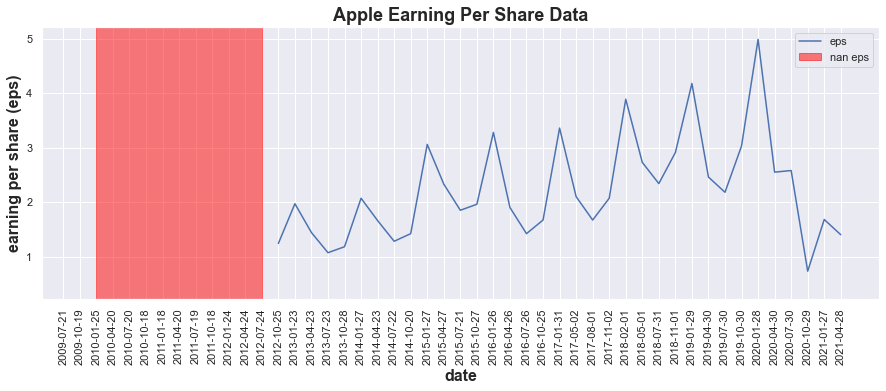

In [30]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(apple_earning_df.date, apple_earning_df.eps, label='eps')
ax.axvspan(apple_eps_nan.date.iloc[1], apple_eps_nan.date.iloc[-1], alpha=0.5, color='red', label='nan eps')
plt.xticks(rotation=90)
plt.title('Apple Earning Per Share Data',  fontsize=18, fontweight='bold')
plt.xlabel('date',  fontsize=16, fontweight='bold')
plt.ylabel('earning per share (eps)',  fontsize=16, fontweight='bold')
plt.legend()
plt.show()

### Handling earnings_df.eps NaN values 

To address this issue, we remove all rows with NaN eps values. In other words, we extract earning data without NaN eps values.

In [31]:
earning_df.shape

(168603, 6)

In [32]:
earning_df = earning_df[earning_df.eps.notna()]
earning_df.head()

,symbol,date,qtr,eps_est,eps,release_time
14,A,2012-11-19,10/2012,0.80,0.84,post
15,A,2013-02-14,01/2013,0.66,0.63,post
16,A,2013-05-14,04/2013,0.67,0.77,post
17,A,2013-08-14,07/2013,0.62,0.68,post
18,A,2013-11-14,10/2013,0.76,0.81,post


In [33]:
earning_df.shape

(136216, 6)

In [34]:
# Check for eps nan data in updated earning dataframe
earning_nan = pd.DataFrame(earning_df.isnull().sum(), columns=['null_count'])
earning_nan['%null_count'] = round(earning_nan['null_count']/earning_df.shape[0]*100, 2)
earning_nan[earning_nan['%null_count'] > 0].sort_values(by='%null_count', ascending=False)

,null_count,%null_count
release_time,48423,35.55
eps_est,25222,18.52
qtr,1004,0.74


### Handling earnings_df.eps_est NaN values 

To address this issue, eps would be the closest estimate for eps_est nan values

In [35]:
# Fill out the eps_est nan values with eps values
earning_df.eps_est = earning_df.eps_est.fillna(earning_df.eps).values

In [36]:
# Check for eps_est nan data in updated earning dataframe
earning_nan = pd.DataFrame(earning_df.isnull().sum(), columns=['null_count'])
earning_nan['%null_count'] = round(earning_nan['null_count']/earning_df.shape[0]*100, 2)
earning_nan[earning_nan['%null_count'] > 0].sort_values(by='%null_count', ascending=False)

,null_count,%null_count
release_time,48423,35.55
qtr,1004,0.74


### Handling earnings_df.release_time NaN values 

The amount of NaN (missing) data for the `release_time` variable is very significant 35.55%. Exploring the release_time variable values shows that post/pre data appeared in bunch mostly. Therefore, filling the nan values using the forward fill (ffill) method seems to be a good choice. 

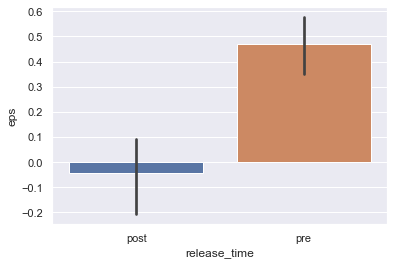

In [37]:
sns.barplot(data=earning_df, x='release_time', y='eps')
plt.show()

In [38]:
# # Fill out the release_time nan values with ffill method
earning_df.release_time = earning_df.release_time.fillna(method='ffill').values

In [39]:
# check for release_time nan data in updated earning dataframe
earning_nan = pd.DataFrame(earning_df.isnull().sum(), columns=['null_count'])
earning_nan['%null_count'] = round(earning_nan['null_count']/earning_df.shape[0]*100, 2)
earning_nan[earning_nan['%null_count'] > 0].sort_values(by='%null_count', ascending=False)

,null_count,%null_count
qtr,1004,0.74


### Handling earnings_df.qtr NaN values 

The qtr is the fiscal quarter, the qrt missing values can be determined from the date. To achieve this task, the plan is to categorize qtr into Q1-Q4 depending on the month the eps was declared.

In [40]:
earning_df.head()

,symbol,date,qtr,eps_est,eps,release_time
14,A,2012-11-19,10/2012,0.80,0.84,post
15,A,2013-02-14,01/2013,0.66,0.63,post
16,A,2013-05-14,04/2013,0.67,0.77,post
17,A,2013-08-14,07/2013,0.62,0.68,post
18,A,2013-11-14,10/2013,0.76,0.81,post


In [41]:
qrt_nan = earning_df[earning_df['qtr'].isnull()]
qrt_nan.head()

,symbol,date,qtr,eps_est,eps,release_time
98,AAC,2019-02-20,NaN,-0.18,0.00,pre
99,AAC,2019-02-27,NaN,-0.18,0.00,pre
236,AAN,2019-02-14,NaN,1.03,1.02,pre
451,AAT,2019-02-12,NaN,0.47,0.14,post
606,AB,2019-02-13,NaN,0.64,0.64,pre


In [42]:
qrt_nan.shape

(1004, 6)

In [43]:
earning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136216 entries, 14 to 168602
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   symbol        136216 non-null  object 
 1   date          136216 non-null  object 
 2   qtr           135212 non-null  object 
 3   eps_est       136216 non-null  float64
 4   eps           136216 non-null  float64
 5   release_time  136216 non-null  object 
dtypes: float64(2), object(4)
memory usage: 12.3+ MB


In [44]:
# Convert date dtype object to datetime 
earning_df.date = pd.to_datetime(earning_df.date).values
earning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136216 entries, 14 to 168602
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   symbol        136216 non-null  object        
 1   date          136216 non-null  datetime64[ns]
 2   qtr           135212 non-null  object        
 3   eps_est       136216 non-null  float64       
 4   eps           136216 non-null  float64       
 5   release_time  136216 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 12.3+ MB


In [45]:
# The plan is to categorize qtr into Q1-Q4 depending on the month the eps was declared
earning_df.qtr=np.ceil(pd.DatetimeIndex(earning_df.date).month/3)
# earning_df['qtr'] = 'Q' + earning_df['qtr'].astype(str)   # Q1, Q2, Q3, Q4 represented by 1, 2, 3 and 4
earning_df.head(5)

,symbol,date,qtr,eps_est,eps,release_time
14,A,2012-11-19,4.0,0.80,0.84,post
15,A,2013-02-14,1.0,0.66,0.63,post
16,A,2013-05-14,2.0,0.67,0.77,post
17,A,2013-08-14,3.0,0.62,0.68,post
18,A,2013-11-14,4.0,0.76,0.81,post


In [46]:
# check for qtr nan data in updated earning dataframe
earning_nan = pd.DataFrame(earning_df.isnull().sum(), columns=['null_count'])
earning_nan['%null_count'] = round(earning_nan['null_count']/earning_df.shape[0]*100, 2)
earning_nan[earning_nan['%null_count'] > 0].sort_values(by='%null_count', ascending=False)

,null_count,%null_count


**Note:** The `earning_df` dataframe doesn't have NaN values anymore.

### Handling summary_df Dataframe Missing (NaN) Values 

Select the appropriate fill method to replace NaN in each column with NaN values

In [47]:
summary_df.head()

,symbol,total_prices,stock_from_date,stock_to_date,total_earnings,earnings_from_date,earnings_to_date
0,A,5418,1999-11-18,2021-06-02,49,2009-05-14,2021-05-25
1,AA,1153,2016-11-01,2021-06-02,18,2017-01-24,2021-04-15
2,AAAP,574,2015-11-11,2018-07-18,0,NaN,NaN
3,AABA,5486,1998-01-02,2020-03-10,14,2014-01-28,2017-04-18
4,AAC,1342,2014-10-02,2021-06-02,22,2014-11-05,2019-08-30


From the summary_df dataframe we observe that when the `total_Earnings` is 0, NaN is assigned to the `earnings_from_date` and `earning_to_date` columns. We also notice that even though `total_Earnings` is 0, 'total_prices' is not. Therefore,  `stock_from_date` will be assigned to `earning_from_date` NaN values,
and `stock_to_date` will be assigned to `earnings_to_date` NaN values.

In [48]:
# Fill out the summary_df NaN values
summary_df['earnings_from_date'].fillna(summary_df['stock_from_date'], inplace=True)
summary_df['earnings_to_date'].fillna(summary_df['stock_to_date'], inplace=True)

In [49]:
# Check for NaN values in summary_df
summary_nan = pd.DataFrame(summary_df.isnull().sum(), columns=['null_count'])
summary_nan['%null_count'] = round(summary_nan['null_count']/summary_df.shape[0]*100, 2)
summary_nan[summary_nan['%null_count'] > 0].sort_values(by='%null_count', ascending=False)

,null_count,%null_count


**Note:** The `summary_df` dataframe doesn't have NaN values anymore.

### Finding Duplicate Rows

In [50]:
# dividend_df
print('The number of duplicte rows in dividend_df is:', format(len(dividend_df[dividend_df.duplicated()])))

# earning_df
print('The number of duplicte rows in earning_df is:',format(len(earning_df[earning_df.duplicated()])))

# stockprice_df
print('The number of duplicte rows in stockprice_df is:',format(len(stockprice_df[stockprice_df.duplicated()])))

# summary_df
print('The number of duplicte rows in summary_df is:',format(len(summary_df[summary_df.duplicated()])))

The number of duplicte rows in dividend_df is: 0
The number of duplicte rows in earning_df is: 0
The number of duplicte rows in stockprice_df is: 0
The number of duplicte rows in summary_df is: 0


**Note:** None of the dataframes contain duplicate rows. 

### Extract Apple Data From all DataFrames

#### Dividend Data

In [51]:
dividend_df.head(2)

,symbol,date,dividend
0,MSFT,2016-11-15,0.39
1,MSFT,2011-05-17,0.16


In [71]:
# Dividend Apple data 
print('dividend_df_apple:')

# Extract dividend data
dividend_df_apple = dividend_df[dividend_df.symbol=='AAPL']
#print('\n', dividend_df_apple.head(2))

# Add a column 'year' 
dividend_df_apple['year'] = pd.DatetimeIndex(dividend_df_apple['date']).year  
#print('\n', dividend_df_apple.head(2))

# Remove 'symbol', date' columns
dividend_df_apple=dividend_df_apple.drop(columns=['symbol','date'])  
#print('\n', dividend_df_apple.head(2))

# Take yearly dividend 
dividend_df_apple = dividend_df_apple.groupby(['year']).mean()  

# Reset index
dividend_df_apple.reset_index(inplace=True) 
dividend_df_apple.head(5)

dividend_df_apple:


,year,dividend
0,2012,2.6500
1,2013,2.9500
2,2014,1.8200
3,2015,0.5075
4,2016,0.5575


#### Earning Data

In [82]:
earning_df.head(2)

,symbol,date,qtr,eps_est,eps,release_time
14,A,2012-11-19,4.0,0.80,0.84,post
15,A,2013-02-14,1.0,0.66,0.63,post


In [72]:
# Earning Apple data
print('earning_df_apple:')

# Extract earning data
earning_df_apple = earning_df[earning_df.symbol=='AAPL'] 
#print('\n', earning_df_apple.head(2))

# Add a column 'year' on apple's dataframe
earning_df_apple['year'] = pd.DatetimeIndex(earning_df_apple['date']).year 
#print('\n', earning_df_apple.head(2))

# Remove 'symbol','date' columns
earning_df_apple = earning_df_apple.drop(['symbol','date'], axis=1)  
#print('\n', earning_df_apple.head(2))

# Compute the mean of the data group by year, release_time, and qtr
earning_df_apple = earning_df_apple.groupby(['year','release_time','qtr']).mean() 
#print('\n', earning_df_apple.head(2))

# Reset index
earning_df_apple.reset_index(inplace=True)   
earning_df_apple.head(5)

earning_df_apple:


,year,release_time,qtr,eps_est,eps
0,2009,post,4.0,0.45,0.45
1,2012,post,4.0,1.26,1.24
2,2013,post,1.0,1.92,1.97
3,2013,post,2.0,1.45,1.44
4,2013,post,3.0,1.04,1.07


#### Stockprice Data

In [83]:
stockprice_df.head(2)

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.85,69.84,67.85,67.87,22.5902,30977700,1.0


In [76]:
# Stockprice Apple data
print('stockprice_df_apple:')

# Extract stockprice data
stockprice_df_apple=stockprice_df[stockprice_df.symbol=='AAPL'] 
#print('\n', stockprice_df_apple.head(2))

# Add a column 'year' 
stockprice_df_apple['year'] = pd.DatetimeIndex(stockprice_df_apple['date']).year 
#print('\n', stockprice_df_apple.head(2))

# Compute the mean of the data group by year and and date
stockprice_df_apple = stockprice_df_apple.groupby(['year','date']).mean() 
#print('\n', stockprice_df_apple.head(2))

# Reset index
stockprice_df_apple.reset_index(inplace=True)
stockprice_df_apple.head()

stockprice_df_apple:


,year,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,1998,1998-01-02,13.63,16.25,13.50,16.25,0.5103,6411700,1.0
1,1998,1998-01-05,16.50,16.56,15.19,15.88,0.4987,5820300,1.0
2,1998,1998-01-06,15.94,20.00,14.75,18.94,0.5948,16182800,1.0
3,1998,1998-01-07,18.81,19.00,17.31,17.50,0.5496,9300200,1.0
4,1998,1998-01-08,17.44,18.62,16.94,18.19,0.5713,6910900,1.0


#### Summary Data

In [84]:
summary_df.head(2)

,symbol,total_prices,stock_from_date,stock_to_date,total_earnings,earnings_from_date,earnings_to_date
0,A,5418,1999-11-18,2021-06-02,49,2009-05-14,2021-05-25
1,AA,1153,2016-11-01,2021-06-02,18,2017-01-24,2021-04-15


In [87]:
# Summary Apple data
print('summary_df_apple:')

# Extract summary data
summary_df_apple = summary_df[summary_df.symbol=='AAPL']   
#print(summary_df_apple.head(2))

# Reset index
summary_df_apple.reset_index(inplace=True)
summary_df_apple.head()

summary_df_apple:


,index,symbol,total_prices,stock_from_date,stock_to_date,total_earnings,earnings_from_date,earnings_to_date
0,16,AAPL,5899,1998-01-02,2021-06-11,48,2009-07-21,2021-04-28


**Note:** Since yearly summary data for each company can be derived from the three dataframes dividends, earnings and stickprice. The last dataframe won't be needed.

### Merging dividend, earning, stock data for Apple stock

In [93]:
df = pd.merge(stockprice_df_apple, earning_df_apple, how='left', on='year')
df = pd.merge(df, dividend_df_apple, how='left', on='year')
df.fillna('no record', inplace=True)
df.head()

,year,date,open,high,low,close,close_adjusted,volume,split_coefficient,release_time,qtr,eps_est,eps,dividend
0,1998,1998-01-02,13.63,16.25,13.50,16.25,0.5103,6411700,1.0,no record,no record,no record,no record,no record
1,1998,1998-01-05,16.50,16.56,15.19,15.88,0.4987,5820300,1.0,no record,no record,no record,no record,no record
2,1998,1998-01-06,15.94,20.00,14.75,18.94,0.5948,16182800,1.0,no record,no record,no record,no record,no record
3,1998,1998-01-07,18.81,19.00,17.31,17.50,0.5496,9300200,1.0,no record,no record,no record,no record,no record
4,1998,1998-01-08,17.44,18.62,16.94,18.19,0.5713,6910900,1.0,no record,no record,no record,no record,no record


In [94]:
df.tail()

,year,date,open,high,low,close,close_adjusted,volume,split_coefficient,release_time,qtr,eps_est,eps,dividend
12050,2021,2021-06-09,127.21,127.75,126.52,127.13,127.13,56877937,1.0,post,2,0.987,1.4,0.2125
12051,2021,2021-06-10,127.02,128.19,125.94,126.11,126.11,71186421,1.0,post,1,1.412,1.68,0.2125
12052,2021,2021-06-10,127.02,128.19,125.94,126.11,126.11,71186421,1.0,post,2,0.987,1.4,0.2125
12053,2021,2021-06-11,126.53,127.44,126.10,127.35,127.35,53522373,1.0,post,1,1.412,1.68,0.2125
12054,2021,2021-06-11,126.53,127.44,126.10,127.35,127.35,53522373,1.0,post,2,0.987,1.4,0.2125


In [95]:
df.shape

(12055, 14)

### Save Apple dataframe as a new CSV file

In [96]:
df.to_csv('data/apple_stockdata_wrangled.csv')

# 3. Exploratiry Data Analysis

# 4. Data Modeling